In [142]:
# coding: utf-8
"""
評価語が一番距離の短いところにあるということを証明するためのコード
"""
from filer2.filer2 import Filer
from library.submodular import SubModular, Vector
import collections
import numpy as np
from scipy.spatial.distance import cosine, sqeuclidean
from scipy.sparse import csr_matrix, vstack
import matplotlib.pylab as plt
% pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [71]:
# ファイルの読み込み
list_sentence = Filer.readtsv('./files/classifiedfile/type11/bigram/bigram/classified-1238_1.tsv')

In [3]:
SM = SubModular(list_sentence)

In [35]:
matrix = SM._cal_matrix_path_out(inverse_flag=False, weight=5)

In [36]:
max_element = matrix.max()
dict_node_score = {}
for i, node in enumerate(SM._list_node):
    list_tmp = [num if num != 0 else max_element for num in matrix.getcol(i).toarray().reshape((1,len(SM._list_node)))[0]]
    dict_node_score[node] = np.sum(list_tmp)

### inverseの場合(ない場合はmax_element)

In [6]:
for row in sorted(dict_node_score.items(), key=lambda x:x[1])[0:20]:
    print row[0], row[1]

利用 3461.66666667
朝食 3494.66666667
良い 3518.66666667
満足 3582.66666667
食事 3587.16666667
美味しい 3609.83333333
ホテル 3640.16666667
和食 3641.33333333
子供 3644.66666667
おいしい 3653.66666667
残念 3670.66666667
部屋 3678.66666667
料理 3685.16666667
種類 3694.16666667
レストラン 3697.66666667
ない 3698.41666667
品数 3710.66666667
中華 3711.66666667
洋食 3728.66666667
いい 3730.66666667


### inverseじゃない場合

In [37]:
for row in sorted(dict_node_score.items(), key=lambda x:x[1])[0:20]:
    print row[0], row[1] 

利用 178909.0
朝食 181082.0
良い 181424.0
満足 185276.0
食事 186020.0
ホテル 186420.0
子供 187115.0
美味しい 188257.0
和食 188379.0
部屋 188751.0
料理 188960.0
種類 189762.0
おいしい 190024.0
レストラン 191043.0
中華 191463.0
いい 191599.0
ない 191729.0
残念 192557.0
洋食 192869.0
夜食 192888.0


In [ ]:
# 分散表現を利用した場合の対比実験

In [5]:
list_word_vec = Filer.readtsv('./files/list_word_vec_s300_w5_m0.tsv')

In [6]:
dict_word_vec = {row[0]: np.array(row[1:], dtype=np.float32) for row in list_word_vec}

In [7]:
cos_matrix = Vector.cal_matrix_cos(SM._list_node, dict_word_vec)

KeyError: '\xe6\xb8\x85\xe6\xbd\x94\xe6\x84\x9f'

In [31]:
def cal_matrix_cos(list_word, dict_word_vec):
        """
        cosine類似度で単語間の距離を計算
        list_word: 単語のリスト
        dict_word_vec: 単語がkey, 分散表現がvalueのdict
        return: cos_matrix: 各単語間の類似度を計算したmatrix
        """
        cos_matrix = np.zeros((len(list_word), len(list_word)))
        for i, word1 in enumerate(list_word):
            for j, word2 in enumerate(list_word):
                try:
                    cos_matrix[i][j] = cosine(dict_word_vec[word1], dict_word_vec[word2])
                except KeyError:
                    cos_matrix[i][j] = 1.0
                
        return cos_matrix
    
def cal_matrix_euc(list_word, dict_word_vec):
        """
        cosine類似度で単語間の距離を計算
        list_word: 単語のリスト
        dict_word_vec: 単語がkey, 分散表現がvalueのdict
        return: cos_matrix: 各単語間の類似度を計算したmatrix
        """
        euc_matrix = np.zeros((len(list_word), len(list_word)))
        for i, word1 in enumerate(list_word):
            for j, word2 in enumerate(list_word):
                try:
                    euc_matrix[i][j] = sqeuclidean(dict_word_vec[word1], dict_word_vec[word2])
                except KeyError:
                    euc_matrix[i][j] = 0
                
        return euc_matrix

In [20]:
cos_matrix = cal_matrix_cos(SM._list_node, dict_word_vec)

In [21]:
dict_word_cos = {}
for i, word in enumerate(SM._list_node):
    dict_word_cos[word] = np.sum(cos_matrix[i])

In [22]:
for row in sorted(dict_word_cos.items(), key=lambda x:x[1])[0:20]:
    print row[0], row[1]

パスタ 615.340516754
洋食 616.83838946
デザート 617.829620908
サラダ 618.911096303
パンケーキ 619.00788399
おかず 619.077499042
肉じゃが 620.339993231
和食 620.375014022
スープ 620.974471616
グラタン 621.439388853
パン 622.015694905
ハンバーグ 622.237370199
おにぎり 622.504758143
ソーセージ 623.301121443
ハム 623.602245766
おひたし 623.77991601
軽食 624.164532091
焼き魚 624.183429758
煮物 624.867371563
バイキング 624.870031386


In [32]:
euc_matrix = cal_matrix_euc(SM._list_node, dict_word_vec)

In [33]:
max_element = np.max(euc_matrix)
dict_word_euc = {}
for i, word in enumerate(SM._list_node):
    list_tmp = [num if num != 0 else max_element for num in euc_matrix[i]]
    dict_word_euc[word] = np.sum(list_tmp)

In [34]:
for row in sorted(dict_word_euc.items(), key=lambda x:x[1])[0:20]:
    print row[0], row[1]

クロージング 682869.43913
サラダ・フルーツ・ゼリー・ポテトフライ・パン 683094.385872
煜実 683334.036506
メープルパイ 683368.750769
ンテンテラスホテル 683523.533618
モーニングビッフェ 683582.601454
メニューバリエ 683723.280411
IKSPIARI 683789.084124
ドリンクバー 683829.325918
グレンサンク 683886.057427
ぁっておもったがおいしくてよかったです 683949.267859
PowerofMusic 684823.985801
ーム 685321.958371
ディズニーホテル 686402.328916
グランサンク 687113.481767
メープル 687389.729124
() 687597.078313
ブローニュ 688457.916201
KIDS 688633.332852
ドリア 689339.422661


In [38]:
# 修正貪欲法のコード

In [189]:
def cal_cost(list_c_word, distance_matrix, scale):
    """
    コスト１回分の計算
    """
    # 単語をidに変換
    list_c_id = sorted([dict_word_id[word] for word in list_c_word])
    dm = distance_matrix[:,list_c_id]
    f_C = 0.0
    for row in dm:
        if scale == 0:
            f_C -= np.exp(np.amin(row))
        elif scale == 1:
            f_C -= np.amin(row)
        else:
            f_C -= np.log(np.amin(row))
    return f_C

def greedy_1(list_C, list_id_document, distance_matrix, r=1, scale=0):
    """
    修正貪欲法のone loopのためのコード
    list_C: 要約文書の集合
    list_document: 追加する文書候補の集合
    distance_matrix: 各ノード間の距離, W * V
    r: コストに追加するハイパーパラメータ
    scale: scale関数、0: e^x, 1: x, 2: ln_x
    """
    # 現在のコストを計算
    
    # 一番初めの時
    if len(list_C) == 0:
        list_id_score = []
        for doc_id, document in list_id_document:
            list_c_word = sorted(list(set([word for word in document])))
            f_C = cal_cost(list_c_word, distance_matrix, scale)
            list_id_score.append([[doc_id, document], f_C])
        doc, _ = sorted(list_id_score, key=lambda x:x[1], reverse=True)[0]
        return doc
    else:
        # 単語のuniqueなリストを作成、単語をidに変換
        list_c_word = sorted(list(set([word for row in list_C for word in row[1]])))
        # f_C: 現在のコストの計算
        f_C = cal_cost(list_c_word, distance_matrix, scale)
        print f_C
        # 文書を１つずつ追加した時のコストの増分を計算
        list_id_score = []
        for doc_id, document in list_id_document:
            # 文章の追加
            list_c_word_s = list(set(list_c_word + document))
            # コストの計算
            f_C_s = cal_cost(list_c_word_s, distance_matrix, scale)
            # スコアの増分を計算
            delta = (f_C_s - f_C)/(np.power(len(document), r))
            list_id_score.append([[doc_id, document], delta])
        # スコアの増分が一番大きかったdocを返す
        doc, _ = sorted(list_id_score, key=lambda x:x[1], reverse=True)[0]
        return doc

def greedy(list_id_document, matrix, num_s = 5, r=1, scale=0):
    """
    修正貪欲法で文章の抽出を行うための関数
    list_id_document: 文idとbag of wordsが記録されたリスト
    matrix: ノード間の距離を記録したmatrix, V * V, numpy_array
    num_s: 抜き出したい文章数
    r: 文の長さに対するコスト
    scale: scale関数として何を使うか、0: e^x, 1: x, 2: ln_x
    """
    # matrixをdistance_matrixに変換
    list_row = [matrix[dict_word_id[word]] for row in list_id_document for word in row[1]]
    distance_matrix = np.vstack(list_row)
    # 要約文章の集合
    list_C = []
    while len(list_C) < num_s:
        doc_id, doc = greedy_1(list_C=list_C,
                               list_id_document=list_id_document,
                               distance_matrix=distance_matrix,
                               r=r, scale=scale)
        list_C.append([doc_id, doc])
        list_id_document.remove([doc_id, doc])
    return list_C

In [92]:
# ファイルの読み込み
list_sentence = Filer.readtsv('./files/classifiedfile/type11/bigram/morpho/classified-1238_0.tsv')
SM = SubModular(list_sentence)
matrix = SM._cal_matrix_path_out(inverse_flag=True, weight=5)

In [93]:
max_element = matrix.max()
matrix = matrix.toarray()
matrix[matrix==0] = max_element

In [94]:
list_id_document = [[i, row] for i, row in enumerate(list_sentence)]

In [95]:
dict_word_id = SM._dict_word_id
list_C = greedy(list_id_document, matrix, num_s = 10, r=1, scale=0)

-1715087234.98
-1661770365.71
-1626225133.08
-1608452917.47
-1599557255.81
-1581774436.96
-1546218964.19
-1537332715.18
-1510674288.49


In [96]:
sentences = Filer.readtxt('./files/classifiedfile/type11/bigram/sentence/classified-1238_0.txt')

In [97]:
for row in list_C:
    print sentences[row[0]]

少し残念でしたのは修学旅行生の宿泊により騒音で体調を崩しかけてしまった事ですが、スタッフの方々のお心遣いで事なきを得ました
当日その場では、金のことでグダグダ言いたくないし、ましてや楽しみにして来ているのに、嫌らしいから言わなかったけど、足下見過ぎ
コンセントの線にゴムテープが巻きついていたので、接触不良なのでしょう
駐車券とクレジットカードのかうんとされた時間で３０分以上もかかっているので、途中交代していただきたかったです
しっかり説明して欲しかったです
自分の住んでいるところ(愛知県)は、ほとんどがタダなのでちょっと意外でした
ホテルスタッフの方も親切丁寧な接客でしたし、荷物を運んでくださった方がとても楽しい方で短い時間でしたが楽しませていただきました
12時チェックアウトが有り難かったです
　チックインして　お昼寝をしましたが　この猛暑で　西日が暑かった
連休にお邪魔しました


In [169]:
list_bag = []
for i in range(40):
    list_bag.append([i, np.random.randint(100, size=4)])

In [170]:
list_edgelist = []
for row in list_bag:
    for i in range(len(row[1])-1):
        list_edgelist.append((row[1][i], row[1][i+1]))

In [171]:
list_node = sorted(list(set([node for row in list_edgelist for node in row])))

In [173]:
import networkx as nx
Graph = nx.DiGraph()
Graph.add_nodes_from(list_node)
Graph.add_edges_from(list_edgelist)

In [174]:
list_node_id = {node: i for i, node in enumerate(list_node)}

In [314]:
list_bag = []
elements = [i for i in range(60)]
weight_high = [2.5 for i in range(20)]
weight_middle = [2 for i in range(20)]
weight_low = [1.5 for i in range(20)]
weights = weight_high + weight_middle + weight_low
weights = np.array(weights)/float(np.sum(weights))
print np.sum(weights)
for i in range(40):
    list_tmp = []
    for j in range(4):
        list_tmp.append(np.random.choice(elements, p=weights))
    list_bag.append(list_tmp)
list_bag = [[str(num) for num in row] for row in list_bag]
list_id_document = [[i, row] for i, row in enumerate(list_bag)]
SM = SubModular(list_bag)
matrix = SM._cal_matrix_path_out(inverse_flag=True, weight=5)
max_element = matrix.max()
matrix = matrix.toarray()
matrix[matrix==0] = max_element
dict_word_id = SM._dict_word_id
list_C = greedy(list_id_document, matrix, num_s = 5, r=1, scale=0)

1.0
-653979.126951
-652365.666299
-651877.183929
-651743.639911


In [315]:
list_C

[[18, ['35', '55', '29', '13']],
 [38, ['18', '17', '32', '21']],
 [24, ['3', '54', '51', '2']],
 [37, ['12', '0', '27', '32']],
 [3, ['20', '14', '38', '39']]]

In [316]:
list_edgelist = []
for row in list_bag:
    for i in range(len(row)-1):
        list_edgelist.append((row[i], row[i+1]))

list_edge = []
for edge, weight in collections.Counter(list_edgelist).items():
    list_edge.append([edge, weight])

In [317]:
list_node = sorted(list(set([node for row in list_edge for node in row[0]])))

In [318]:
import networkx as nx
Graph = nx.DiGraph()
Graph.add_nodes_from(list_node)
for row in list_edge:
    Graph.add_edge(row[0][0], row[0][1], weight=row[1])

In [319]:
pos = nx.spring_layout(Graph)

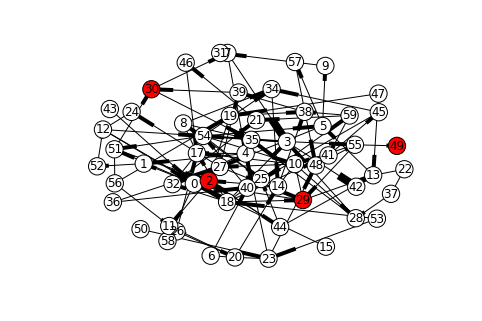

In [320]:
plt.figure()
#nx.draw_networkx_nodes(Graph, pos, node_size=200, node_color='white')
listcolor = []
for num in list_node:
    if num in list_C[0][1]:
        listcolor.append('#ff0000')
    else:
        listcolor.append('w')
weights = [Graph[u][v]['weight'] for u,v in Graph.edges()]
nx.draw(Graph, pos, with_labels=True, node_color=listcolor, width=weights*10)
plt.show()

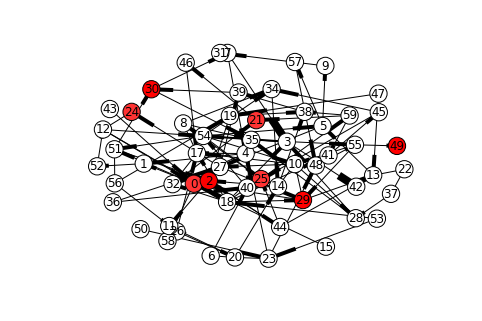

In [321]:
plt.figure()
#nx.draw_networkx_nodes(Graph, pos, node_size=200, node_color='white')
listcolor = []
for num in list_node:
    if num in list_C[1][1]:
        listcolor.append('#ff3333')
    elif num in list_C[0][1]:
        listcolor.append('#ff0000')
    else:
        listcolor.append('w')
weights = [Graph[u][v]['weight'] for u,v in Graph.edges()]
nx.draw(Graph, pos, with_labels=True, node_color=listcolor, width=weights*10)
plt.show()

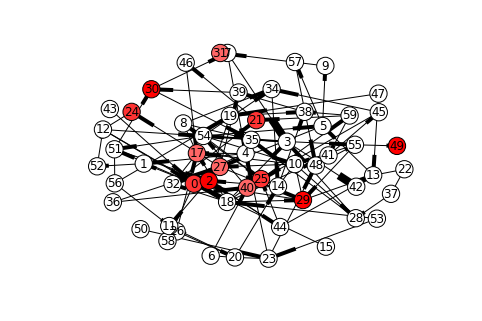

In [322]:
plt.figure()
#nx.draw_networkx_nodes(Graph, pos, node_size=200, node_color='white')
listcolor = []
for num in list_node:
    if num in list_C[2][1]:
        listcolor.append('#ff6666')
    elif num in list_C[1][1]:
        listcolor.append('#ff3333')
    elif num in list_C[0][1]:
        listcolor.append('#ff0000')
    else:
        listcolor.append('w')
weights = [Graph[u][v]['weight'] for u,v in Graph.edges()]
nx.draw(Graph, pos, with_labels=True, node_color=listcolor, width=weights*10)
plt.show()

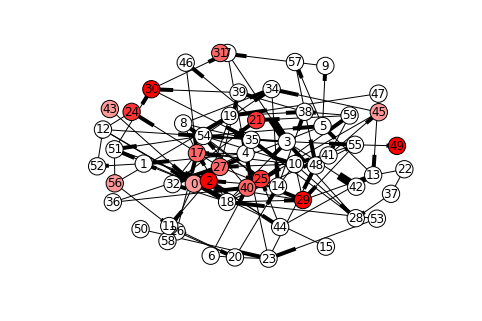

In [323]:
plt.figure()
#nx.draw_networkx_nodes(Graph, pos, node_size=200, node_color='white')
listcolor = []
for num in list_node:
    if num in list_C[3][1]:
        listcolor.append('#ff9999')
    elif num in list_C[2][1]:
        listcolor.append('#ff6666')
    elif num in list_C[1][1]:
        listcolor.append('#ff3333')
    elif num in list_C[0][1]:
        listcolor.append('#ff0000')
    else:
        listcolor.append('w')
weights = [Graph[u][v]['weight'] for u,v in Graph.edges()]
nx.draw(Graph, pos, with_labels=True, node_color=listcolor, width=weights*10)
plt.show()

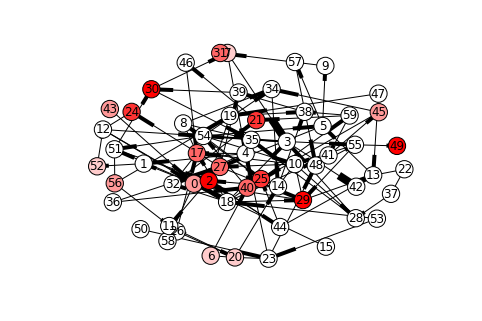

In [324]:
plt.figure()
#nx.draw_networkx_nodes(Graph, pos, node_size=200, node_color='white')
listcolor = []
for num in list_node:
    if num in list_C[4][1]:
        listcolor.append('#ffcccc')
    elif num in list_C[3][1]:
        listcolor.append('#ff9999')
    elif num in list_C[2][1]:
        listcolor.append('#ff6666')
    elif num in list_C[1][1]:
        listcolor.append('#ff3333')
    elif num in list_C[0][1]:
        listcolor.append('#ff0000')
    else:
        listcolor.append('w')
weights = [Graph[u][v]['weight'] for u,v in Graph.edges()]
nx.draw(Graph, pos, with_labels=True, node_color=listcolor, width=weights*10)
plt.show()

118